## Data Understanding

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load and Reading Data

In [ ]:
# Load the datasets from Excel files
excel_sales_data = pd.ExcelFile('sales_data.xlsx')
excel_customer_data = pd.ExcelFile('customer_data.xlsx')
excel_shopping_mall_data = pd.ExcelFile('shopping_mall_data.xlsx')

# Read each sheet into a DataFrame
sales_data = pd.read_excel(excel_sales_data, sheet_name='sales_data')
customer_data = pd.read_excel(excel_customer_data, sheet_name='customer_data')
shopping_mall_data = pd.read_excel(excel_shopping_mall_data, sheet_name='shopping_mall')

In [ ]:
# Display the first 5 rows of each dataset
print("Sales Data:")
sales_data.head()

Sales Data:


,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall
0,I138884,C241288,Clothing,5,05/08/2022,1500.40,South Coast Plaza
1,I317333,C111565,Shoes,3,12/12/2021,1800.51,Beverly Center
2,I127801,C266599,Clothing,1,09/11/2021,300.08,Westfield Century City
3,I173702,C988172,Shoes,5,05/16/2021,3000.85,Stanford Shopping Center
4,I337046,C189076,Books,4,10/24/2021,60.60,South Coast Plaza


In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   invoice date   99457 non-null  object 
 5   price          99457 non-null  float64
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


In [ ]:
print("Customer Data:")
customer_data.head()

Customer Data:


,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
print("Shopping Mall Data:")
shopping_mall_data.head()

Shopping Mall Data:


,shopping_mall,construction_year,area (sqm),location,store_count
0,South Coast Plaza,1967,250000,Costa Mesa,270
1,Westfield Valley Fair,1986,220000,Santa Clara,230
2,The Grove,2002,56000,Los Angeles,140
3,Westfield Century City,1964,133000,Los Angeles,200
4,Beverly Center,1982,111000,Los Angeles,160


In [ ]:
shopping_mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   shopping_mall      10 non-null     object
 1   construction_year  10 non-null     int64 
 2   area (sqm)         10 non-null     int64 
 3   location           10 non-null     object
 4   store_count        10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes


### 2. Checking for Duplicates

In [ ]:
print("Sales Data Duplicates:", sales_data.duplicated().sum())
print("Customer Data Duplicates:", customer_data.duplicated().sum())
print("Shopping Mall Data Duplicates:", shopping_mall_data.duplicated().sum())

Sales Data Duplicates: 0
Customer Data Duplicates: 0
Shopping Mall Data Duplicates: 0


### 3. Checking for Missing Values

In [ ]:
# Function to analyze missing values
def analyze_missing_values(df, df_name):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    missing_data['Percentage'] = missing_data['Percentage'].round(2)
    print(f"\nMissing Values in {df_name}:")
    print(missing_data)

analyze_missing_values(sales_data, 'Sales Data')
analyze_missing_values(customer_data, 'Customer Data')
analyze_missing_values(shopping_mall_data, 'Shopping Mall Data')


Missing Values in Sales Data:
               Missing Values  Percentage
invoice_no                  0         0.0
customer_id                 0         0.0
category                    0         0.0
quantity                    0         0.0
invoice date                0         0.0
price                       0         0.0
shopping_mall               0         0.0

Missing Values in Customer Data:
                Missing Values  Percentage
customer_id                  0        0.00
gender                       0        0.00
age                        119        0.12
payment_method               0        0.00

Missing Values in Shopping Mall Data:
                   Missing Values  Percentage
shopping_mall                   0         0.0
construction_year               0         0.0
area (sqm)                      0         0.0
location                        0         0.0
store_count                     0         0.0


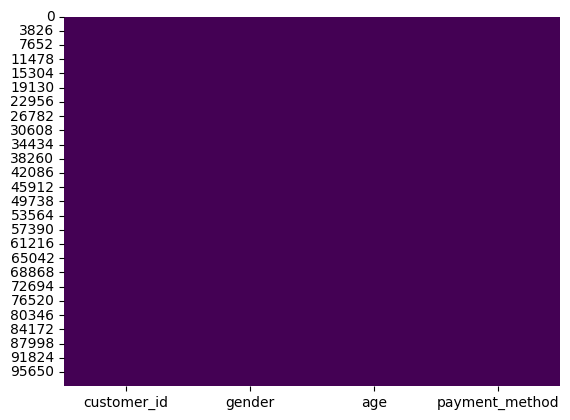

In [ ]:
# Visualization of missing values with heatmaps
sns.heatmap(customer_data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
# Check the distribution of missing 'age' values
print("Rows with missing 'age' values:")
print(customer_data[customer_data['age'].isnull()].head())

# Check if missing 'age' values are correlated with other columns
print("\nMissing 'age' values by gender:")
print(customer_data[customer_data['age'].isnull()]['gender'].value_counts())

print("\nMissing 'age' values by payment_method:")
print(customer_data[customer_data['age'].isnull()]['payment_method'].value_counts())

Rows with missing 'age' values:
   customer_id  gender  age payment_method
91     C157070  Female  NaN     Debit Card
92     C177975  Female  NaN     Debit Card
93     C830576  Female  NaN     Debit Card
94     C807389  Female  NaN     Debit Card
95     C277842  Female  NaN     Debit Card

Missing 'age' values by gender:
gender
Female    70
Male      49
Name: count, dtype: int64

Missing 'age' values by payment_method:
payment_method
Cash           50
Debit Card     36
Credit Card    33
Name: count, dtype: int64


### 4. Check for inconsistencies in shopping_mall column

In [ ]:
# Get unique shopping mall names from both datasets
unique_sales_malls = sales_data['shopping_mall'].unique()
unique_shopping_malls = shopping_mall_data['shopping_mall'].unique()

print("Unique Shopping Malls in Sales Data:")
print(unique_sales_malls)
print("\nUnique Shopping Malls in Shopping Mall Data:")
print(unique_shopping_malls)

mismatched_malls = set(unique_sales_malls) - set(unique_shopping_malls)
print("\nMismatched Shopping Malls (in Sales Data but not in Shopping Mall Data):")
print(mismatched_malls)

Unique Shopping Malls in Sales Data:
['South Coast Plaza' 'Beverly Center' 'Westfield Century City'
 'Stanford Shopping Center' 'Westfield Valley Fair'
 'Del Amo Fashion Center' 'The Grove' 'Irvine Spectrum'
 'Glendale Galleria' 'Fashion Valley']

Unique Shopping Malls in Shopping Mall Data:
['South Coast Plaza' 'Westfield Valley Fair' 'The Grove'
 'Westfield Century City' 'Beverly Center' 'Fashion Valley'
 'Stanford Shopping Center' 'Glendale Galleria' 'Irvine Spectrum Center'
 'Del Amo Fashion Center']

Mismatched Shopping Malls (in Sales Data but not in Shopping Mall Data):
{'Irvine Spectrum'}


## Data Preparation

### 1. Handle Missing Value

In [ ]:
customer_data['age'] = customer_data['age'].fillna(customer_data['age'].median())
customer_data.isnull().sum()

,0
customer_id,0
gender,0
age,0
payment_method,0


In [ ]:
# Identify customer_id values in sales_data that are missing in customer_data
missing_customers = sales_data[~sales_data['customer_id'].isin(customer_data['customer_id'])]

# Print the missing customer_id values
print("Missing sales_data customer_id values in customer_data:")
print(missing_customers['customer_id'].unique())

Missing sales_data customer_id values in customer_data:
[]


In [ ]:
# Identify customer_id values in sales_data that are missing in customer_data
missing_customers = sales_data[~sales_data['customer_id'].isin(customer_data['customer_id'])]

# Print the missing customer_id values
print("Missing customer_id values in customer_data:")
print(missing_customers['customer_id'].unique())

Missing customer_id values in customer_data:
[]


In [ ]:
# Get unique customer_id values in sales_data
unique_sales_customers = sales_data['customer_id'].unique()

# Get unique customer_id values in customer_data
unique_customer_customers = customer_data['customer_id'].unique()

# Check if all customer_id values in sales_data exist in customer_data
missing_customers = set(unique_sales_customers) - set(unique_customer_customers)
print("Missing customer_id values in customer_data:")
print(missing_customers)

Missing customer_id values in customer_data:
set()


### 2. Changing Data Types

In [ ]:
# Convert data types
sales_data['invoice date'] = pd.to_datetime(sales_data['invoice date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')  # Formating datetime for further analysis
customer_data['age'] = customer_data['age'].astype(int)

print("Sales Data Types:")
print(sales_data.dtypes)
print("\nCustomer Data Types:")
print(customer_data.dtypes)
print("\nShopping Mall Data Types:")
print(shopping_mall_data.dtypes)

Sales Data Types:
invoice_no        object
customer_id       object
category          object
quantity           int64
invoice date      object
price            float64
shopping_mall     object
dtype: object

Customer Data Types:
customer_id       object
gender            object
age                int64
payment_method    object
dtype: object

Shopping Mall Data Types:
shopping_mall        object
construction_year     int64
area (sqm)            int64
location             object
store_count           int64
dtype: object


### 3. Resolving the Price Column Issue

In [ ]:
# Calculate unit price and round to 2 decimal places
sales_data['price'] = sales_data['price'].round(2)  # Round price to 2 decimal places
sales_data['unit_price'] = (sales_data['price'] / sales_data['quantity']).round(2)

# Verify if price represents total price
unique_categories = sales_data['category'].nunique()
unique_unit_prices = sales_data['unit_price'].nunique()

print(f"Unique Categories: {unique_categories}")
print(f"Unique Unit Prices: {unique_unit_prices}")

if unique_categories == unique_unit_prices:
    print("The 'price' column represents TOTAL PRICE.")
else:
    print("The 'price' column may not represent TOTAL PRICE. Further analysis is needed.")

Unique Categories: 8
Unique Unit Prices: 8
The 'price' column represents TOTAL PRICE.


In [ ]:
# Drop the unit_price column
sales_data = sales_data.drop(columns=['unit_price'])

### 4. Resolve inconsistencies in shopping_mall column

In [ ]:
# Create a mapping dictionary to standardize names
mall_name_mapping = {'Irvine Spectrum': 'Irvine Spectrum Center'}

# Apply the mapping to the sales_data shopping_mall column
sales_data['shopping_mall'] = sales_data['shopping_mall'].replace(mall_name_mapping)

updated_unique_sales_malls = sales_data['shopping_mall'].unique()
print("Updated Unique Shopping Malls in Sales Data:")
print(updated_unique_sales_malls)

Updated Unique Shopping Malls in Sales Data:
['South Coast Plaza' 'Beverly Center' 'Westfield Century City'
 'Stanford Shopping Center' 'Westfield Valley Fair'
 'Del Amo Fashion Center' 'The Grove' 'Irvine Spectrum Center'
 'Glendale Galleria' 'Fashion Valley']


### 5. Renaming Columns

In [ ]:
# Rename columns for consistency
sales_data = sales_data.rename(columns={'price': 'total_price', 'invoice date': 'invoice_date'})
shopping_mall_data = shopping_mall_data.rename(columns={'area (sqm)': 'area_sqm'})

print("Sales Data Columns:", sales_data.columns)
print("\nShopping Mall Data Columns:", shopping_mall_data.columns)

Sales Data Columns: Index(['invoice_no', 'customer_id', 'category', 'quantity', 'invoice_date',
       'total_price', 'shopping_mall'],
      dtype='object')

Shopping Mall Data Columns: Index(['shopping_mall', 'construction_year', 'area_sqm', 'location',
       'store_count'],
      dtype='object')


### 6. Converting All Datasets to CSV

In [ ]:
# Save datasets to CSV files
sales_data.to_csv('sales_data_clean.csv', index=False)
customer_data.to_csv('customer_data_clean.csv', index=False)
shopping_mall_data.to_csv('shopping_mall_data_clean.csv', index=False)

# Save datasets to Excel files
sales_data.to_excel('sales_data_clean.xlsx', index=False)
customer_data.to_excel('customer_data_clean.xlsx', index=False)
shopping_mall_data.to_excel('shopping_mall_data_clean.xlsx', index=False)

print("The dataset has been saved as both CSV and Excel files, ready for further analysis.")

The dataset has been saved as both CSV and Excel files, ready for further analysis.
